**The Objective of this kernel is to get you on your feet. I would be using Logisitic Regression to create a basic baseline prediction model. Once we have that in place we would be doing some basic data cleaning and applying SVM,Naive Bayes to the data.**

Would be adding - data visualization , feature engineering steps in the future.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
score_df = pd.DataFrame(columns={'Model Description','Score'})
# Any results you write to the current directory are saved as output.

**1. Loading data set **

In [2]:
df_train = pd.read_csv('rawdata/train.csv')
df_test = pd.read_csv('rawdata/test.csv')

**2. Let's take initial look at the data **

In [3]:
 print(df_train.head(5))

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


Check for Null/NAN Values

In [5]:
print(df_train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [6]:
print(df_test.isnull().sum()s)

id             0
keyword       26
location    1105
text           0
dtype: int64


In [7]:
print(df_train.shape)

(7613, 5)


Exploring the data distribution of tweets

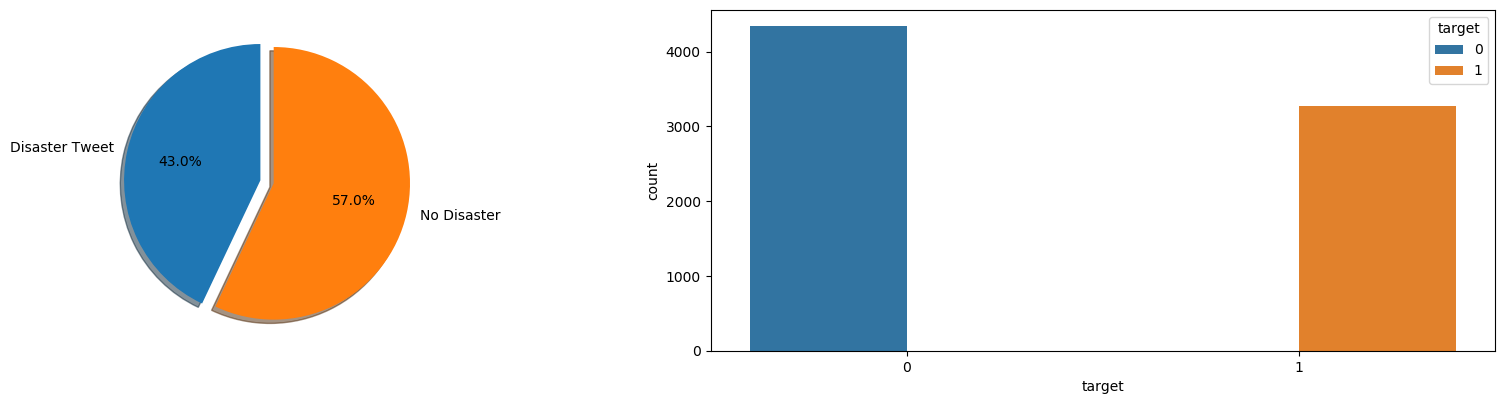

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

labels=['Disaster Tweet','No Disaster']
size=  [df_train['target'].mean()*100,abs(1-df_train['target'].mean())*100]
explode = (0, 0.1)
#ig1,ax1 = plt.subplots()
axes[0].pie(size,labels=labels,explode=explode,shadow=True,
            startangle=90,autopct='%1.1f%%')
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])
plt.show()

Before analyzing the data further would be nice to have a baseline model driven off just the tweet Text and TFIDF transformer. once we have some baseling we would look at some more visualization and feature engineering

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

# 学習データをtrainとtestに分割する
X_train,X_test,y_train,y_test = train_test_split(df_train['text'],df_train['target'])
vector = TfidfVectorizer().fit(X_train)

#print(vector.get_feature_names())
X_train_vector = vector.transform(X_train)
#print(X_train_vector.toarray())


X_test_vector = vector.transform(X_test)
#print(X_test_vector)
model = LogisticRegression().fit(X_train_vector,y_train)
print('Logistic Regression ROC Auc Score with TFIDF - %3f'%(roc_auc_score(y_test,model.predict(X_test_vector))))
print('F1Score - %3f'%(f1_score(y_test,model.predict(X_test_vector))))
score_df = score_df.append({'Model Description':'Basic LR Model - Basline - TFIDF',
                           'Score':roc_auc_score(y_test,model.predict(X_test_vector))}
                           ,ignore_index=True)

####### Now let's try with count vectorizer

cv_vector = CountVectorizer().fit(X_train)
X_train_vector = cv_vector.transform(X_train)
X_test_vector = cv_vector.transform(X_test)

model = LogisticRegression().fit(X_train_vector,y_train)
predict = model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Logistic Regression Roc AUC Score with countvectorizer - %3f'%score)

score_df = score_df.append({'Model Description':'Basic LR Model - Basline - CV',
                          'Score':score}
                          ,ignore_index=True)
score_df

/Users/yonezu.t/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
Logistic Regression ROC Auc Score with TFIDF - 0.788262
F1Score - 0.750000
Logistic Regression Roc AUC Score with countvectorizer - 0.790358
/Users/yonezu.t/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model Description,Score
0,Basic LR Model - Basline - TFIDF,0.786502
1,Basic LR Model - Basline - CV,0.789852
2,Basic LR Model - Basline - TFIDF,0.787483
3,Basic LR Model - Basline - CV,0.769207
4,Basic LR Model - Basline - TFIDF,0.785452
5,Basic LR Model - Basline - CV,0.782244
6,Basic LR Model - Basline - TFIDF,0.798910
7,Basic LR Model - Basline - CV,0.797844
8,Basic LR Model - Basline - TFIDF,0.782481
9,Basic LR Model - Basline - CV,0.790973


**3. Clean Data**  - So we have a baseline score of 79% to work with , let's get to clean data and see if we can improve the score

As first step in cleaning - let us replace some commonly occuring shorthands 

In [21]:

def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"she'll", "she will", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"   ", " ", text) # Remove any extra spaces
    return text


df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

In the next step we are going to do some further massaging which would make Job of Prediction Algorithm easy

* Let us remove any characters other then alphabets
* Convert all dictionary to lower case - for consistency 
* Lemmatize - More details on Stemming and Lemmatization [here](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)


Also we are going to store this text in a seperate column as we want to keep the orignal text in case we want to do some feature engineering down the line.

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download("wordnet")


def massage_text(text):
    
    
    ## remove anything other then characters and put everything in lowercase
    tweet = re.sub("[^a-zA-Z]", ' ', text)
    tweet = tweet.lower()
    tweet = tweet.split()

    
    
    lem = WordNetLemmatizer()
    tweet = [lem.lemmatize(word) for word in tweet
             if word not in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    return tweet
    print('--here goes nothing')
    print(text)
    print(tweet)

df_train['clean_text'] = df_train['text'].apply(massage_text)
df_test['clean_text'] = df_test['text'].apply(massage_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonezu.t/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yonezu.t/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Let's take a look at the data now 

In [ ]:
df_train.iloc[0:10][['text','clean_text']]

**4. Creation of more Models**

4.1 Start by creating a Logistic Regression model again , this time we will use Grid Seach for hyper-parameter optimization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

vector = TfidfVectorizer().fit(df_train['clean_text'])
df_train_vector = vector.transform(df_train['clean_text'])
df_test_vector = vector.transform(df_test['clean_text'])
lr_model = LogisticRegression()
grid_values =  {'penalty':['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
grid_search_model = GridSearchCV(lr_model,param_grid=grid_values,cv=3)
grid_search_model.fit(df_train_vector,df_train['target'])

print(grid_search_model.best_estimator_)
print(grid_search_model.best_score_)
print(grid_search_model.best_params_)

## dumping the output to a file 
predict_df = pd.DataFrame()
predict = grid_search_model.predict(df_test_vector)
predict_df['id'] = df_test['id']
predict_df['target'] = predict
predict_df.to_csv('sample_submission_2.csv', index=False)
score_df = score_df.append({'Model Description':'LR Model - with data cleaning and Grid Search',
                           'Score':grid_search_model.best_score_}
                           ,ignore_index=True)


### let's have another model with some ngram's though 
X_train,X_test,y_train,y_test = train_test_split(df_train['clean_text'],df_train['target'])
vector = TfidfVectorizer(ngram_range=(1,3)).fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,y_train)
predict = lr_model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Roc AUC curve for LR and TFIDF with ngrams  - %3f'%score)

score_df = score_df.append({'Model Description':'LR Model - with ngram range',
                           'Score':score}
                           ,ignore_index=True)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### let's have another model with some ngram's though 
X_train,X_test,y_train,y_test = train_test_split(df_train['clean_text'],df_train['target'])
vector = TfidfVectorizer(ngram_range=(1,3)).fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,y_train)
predict = lr_model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Roc AUC curve for LR and TFIDF with ngrams  - %3f'%score)

score_df = score_df.append({'Model Description':'LR Model - with ngram range',
                           'Score':grid_search_model.score}
                           ,ignore_index=True)

vector = TfidfVectorizer(ngram_range=(1,3)).fit(df_train['clean_text'])
X_train_vector = vector.transform(df_train['clean_text'])
X_test_vector = vector.transform(df_test['clean_text'])
lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,df_train['target'])
predict = lr_model.predict(X_test_vector)


## dumping the output to a file 
predict_df = pd.DataFrame()
predict_df['id'] = df_test['id']
predict_df['target'] = predict
predict_df.to_csv('sample_submission_001.csv', index=False)


In [ ]:
pd.concat([df_test,predict_df['target']],axis=1)

### you could dump this in a csv and do further analysis to check what
### misclassifications are there manually ,observations could then be used 
### to further tweak stuff


4.2 Let's apply Gaussian NB to the data 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = \
        train_test_split(df_train['clean_text'], df_train['target'], random_state=20)
## Apply Tfidf tranformation
vector = TfidfVectorizer().fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector  = vector.transform(X_test)
df_test_vector = vector.transform(df_test['clean_text'])

gb_model= GaussianNB().fit(X_train_vector.todense(),y_train)
predict = gb_model.predict(X_test_vector.todense())

print('Roc AUC score - %3f'%(roc_auc_score(y_test,predict)))
score_df = score_df.append({'Model Description':'Naive Bayes',
                           'Score':roc_auc_score(y_test,predict)}
                           ,ignore_index=True)


4.3 Support Vector Classifier - with Grid search to Optimize parameters

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

vector = TfidfVectorizer().fit(df_train['clean_text'])
df_train_vector = vector.transform(df_train['clean_text'])
df_test_vector = vector.transform(df_test['clean_text'])

svc_model = SVC()
grid_values={'kernel':['linear', 'poly', 'rbf'],'C':[0.001,0.01,1,10]}
grid_search_model= GridSearchCV(svc_model,param_grid=grid_values,cv=3)
grid_search_model.fit(df_train_vector,df_train['target'])

print(grid_search_model.best_estimator_)
print(grid_search_model.best_score_)
print(grid_search_model.best_params_)

score_df = score_df.append({'Model Description':'SVC - with Grid Search',
                           'Score':grid_search_model.best_score_}
                           ,ignore_index=True)

predict = grid_search_model.predict(df_test_vector)
predict_df = pd.DataFrame()
predict_df['id'] = df_test['id']
predict_df['target'] = predict

# # print(predict_df.head(5))
predict_df.to_csv('sample_submission_4.csv', index=False)


Let's look at score_df which has scores of all models till now and let's sort the output in ascending based on the Score

In [ ]:
score_df[['Model Description','Score']]

**Please Upvote if you found the notebook usefull.**

4. More data cleaning/ Feature Engineering

In [ ]:
#########  Word Count

import seaborn as sns
from matplotlib import pyplot as plt


# df_train



df_train['word_count'] = df_train['text'].apply(lambda x : len(x.lower().split()))
df_test['word_count'] = df_test['text'].apply(lambda x : len(x.lower().split()))


print('Average word count for non-disaster tweet - %.3f \
      '%(df_train[df_train['target']==0]['word_count'].mean()))

      
print('Average word count for disaster tweet - %.3f \
      '%(df_train[df_train['target']==1]['word_count'].mean()))

plt.figure(figsize=(12,6))
sns.boxplot(x='target',y='word_count',data=df_train)



In [ ]:
#### Unique Word Count

df_train['u_word_count'] = df_train['text'].apply(lambda x : len(set(x.lower().split())))
df_test['u_word_count'] = df_test['text'].apply(lambda x : len(set(x.lower().split())))

print('Average word count for non disaster tweet - %.3f \
      '%(df_train[df_train['target']==0]['u_word_count'].mean()))

      
print('Average word count for disaster tweet - %.3f \
      '%(df_train[df_train['target']==1]['u_word_count'].mean()))


In [ ]:
#### Stop word count

from nltk.corpus import stopwords

stop_words = set (stopwords.words("english"))
temp ='here you go then'
df_train['stop_word_count']=df_train['text'].apply(lambda x : \
                                                   len([w for w in x.split() if w in stop_words] ))
df_test['stop_word_count']=df_test['text'].apply(lambda x : \
                                                   len([w for w in x.split() if w in stop_words] ))


print('Average word count for non-disaster tweet - %.3f \
      '%(df_train[df_train['target']==0]['stop_word_count'].mean()))

      
print('Average word count for disaster tweet - %.3f \
      '%(df_train[df_train['target']==1]['stop_word_count'].mean()))


In [ ]:
##### URL count
import re


df_train['url_count'] = df_train['text'].apply(lambda x: len(re.findall('http[s]*:',x)))
df_test['url_count'] = df_test['text'].apply(lambda x: len(re.findall('http[s]*:',x)))


In [ ]:
## mean word length count 

df_train['mean_word_l_count'] = df_train.apply(lambda r : len(r['text'])/r['word_count'],axis=1)
df_test['mean_word_l_count'] = df_test.apply(lambda r : len(r['text'])/r['word_count'],axis=1)


print(df_test[['mean_word_l_count','text']])

In [ ]:
## hash_count  count

df_train['hash_count'] = df_train['text'].apply(lambda x: len(re.findall('#',x)))
df_test['hash_count'] = df_test['text'].apply(lambda x: len(re.findall('#',x)))


In [ ]:
### mention count @


## hash_count  count

df_train['mention_count'] = df_train['text'].apply(lambda x: len(re.findall('@',x)))
df_test['mention_count'] = df_test['text'].apply(lambda x: len(re.findall('@',x)))


In [ ]:
import multiprocessing

from gensim.models import Word2Vec

cores= multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=5,
                     window = 2,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     workers=3
                     )



w2v_model.build_vocab(df_train['text'],progress_per=50)


w2v_model.train(df_train['text'],total_examples=w2v_model.corpus_count,epochs=30,report_delay=1)

w2v_model.init_sims(replace=True)

print(w2v_model.wv.most_similar(positive=["closed"]))